In [ ]:
from sklearn.datasets import load_files
import numpy as np

In [37]:
reviews_train = load_files("C:\\Users\\user\Desktop\BigData\\aclImdb_v1\my_reviews\\train")
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [38]:
reviews_test = load_files("C:\\Users\\user\Desktop\BigData\\aclImdb_v1\my_reviews\\test")
text_test, y_test = reviews_test.data, reviews_test.target
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
stop_words = [
    "a", "an", "and", "the", "it", "is", "was", "are", "were", "in",
    "on", "at", "to", "with", "for", "of", "by", "from", "as", "but",
    "not", "this", "that", "I", "you", "he", "she", "we", "they",
    "me", "him", "her", "us", "them", "my", "your", "his", "its", "our", "their",
    "be", "have", "do", "does", "did", "been", "has", "had", "doing", "will", "would",
    "should", "could", "can", "may", "might", "must", "shall", "into", "out", "up", "down",
    "over", "under", "through", "between", "among", "before", "after", "above", "below", "when", "where",
    "how", "why", "what", "which", "who", "whom", "whose", "if", "else", "or", "because",
    "while", "since", "until", "so", "such", "very", "too", "just", "now", "then"
]
vect_tfidf = TfidfVectorizer(max_features=1000, max_df=.15, stop_words=stop_words)
vect = CountVectorizer(max_features=1000, max_df=.15, stop_words=stop_words)
X_train_tfidf  = vect_tfidf.fit_transform(text_train)
X_test_tfidf = vect_tfidf.transform(text_test)
X = vect.fit_transform(text_train)


In [40]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Инициализация логистической регрессии
logreg = LogisticRegression()

# Обучение модели на тренировочных данных
logreg.fit(X_train_tfidf, y_train)

# Предсказание на тестовых данных
y_pred = logreg.predict(X_test_tfidf)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод отчета о классификации
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.67      0.40      0.50        10
           2       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.44      0.33      0.38        20
weighted avg       0.67      0.50      0.57        20


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# Получение коэффициентов модели
coefficients = logreg.coef_[0]

# Получение индексов признаков с наибольшими и наименьшими коэффициентами
top_coef_indices = coefficients.argsort()[-10:][::-1]  # Топ-10 признаков с наибольшими коэффициентами
bottom_coef_indices = coefficients.argsort()[:10]      # Топ-10 признаков с наименьшими коэффициентами

# Получение соответствующих слов
feature_names = vect.get_feature_names_out()
top_words = [feature_names[i] for i in top_coef_indices]
bottom_words = [feature_names[i] for i in bottom_coef_indices]

# Вывод результатов
print("\nTop 10 слов с наибольшими коэффициентами:")
print(top_words)

print("\nTop 10 слов с наименьшими коэффициентами:")
print(bottom_words)



Top 10 слов с наибольшими коэффициентами:
['constant', 'making', 'purchases', 'ruining', 'pushy', 'excessive', 'glitchy', 'buggy', 'frustrating', 'disappointing']

Top 10 слов с наименьшими коэффициентами:
['exploration', 'level', 'gaming', 'new', 'development', 'character', 'graphics', 'mechanics', 'stunning', 'offers']


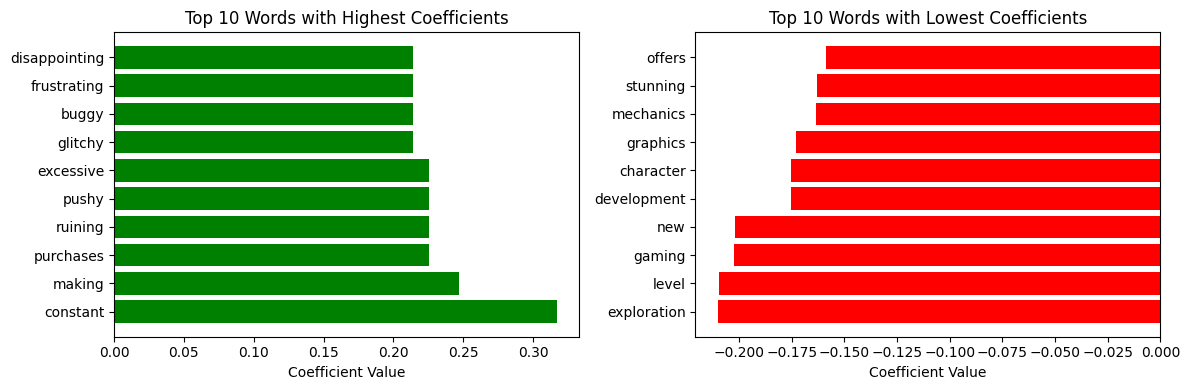

In [42]:
import matplotlib.pyplot as plt

# Визуализация топ-10 слов с наибольшими и наименьшими коэффициентами
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Топ-10 слов с наибольшими коэффициентами
axes[0].barh(top_words, coefficients[top_coef_indices], color='green')
axes[0].set_title('Top 10 Words with Highest Coefficients')
axes[0].set_xlabel('Coefficient Value')

# Топ-10 слов с наименьшими коэффициентами
axes[1].barh(bottom_words, coefficients[bottom_coef_indices], color='red')
axes[1].set_title('Top 10 Words with Lowest Coefficients')
axes[1].set_xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


In [60]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20, learning_method="batch", max_iter=10, random_state=0)
# мы строим модель и преобразуем данные в один этап 
# преобразование займет некоторое время
# и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

In [61]:

lda.components_.shape

(20, 198)

In [62]:
# Для каждой темы (строки в components_) сортируем признаки (по возрастанию) 
# Инвертируем строки с помощью [:, ::-1], чтобы получить сортировку по убыванию 
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# получем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names_out())

In [46]:
import mglearn  
# выводим 10 тем
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk = 5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
world         overall       storyline     kept          exploration   
development   open          narrative     level         making        
character     constant      satisfactory  new           offers        
worst         world         providing     hooked        balance       
many          without       underwhelming any           suitable      
microtransactionsremarkable    neither       finish        fair          
give          elements      nor           gamer         various       
advantage     contribute    exceptional   start         combat        
significant   particularly  overall       incredible    preferences   
pay           being         gaming        play          player        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
p

In [47]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [48]:
topics = np.array([7, 15, 25, 26, 28, 39, 40, 41, 55, 56, 64, 67, 89, 99])

sorting100 = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting100, topics_per_chunk=7, n_words=20)


topic 7       topic 15      topic 25      topic 26      topic 28      topic 39      topic 40      
--------      --------      --------      --------      --------      --------      --------      
worthy        worthy        storyline     controls      kept          casual        worthy        
flawless      flawless      depth         clunky        masterpiece   average       flawless      
felt          felt          couldn        nearly        storytelling  engagement    felt          
feels         feels         connect       impossible    seat          sessions      feels         
fantastic     fantastic     forgettable   precise       compelling    level         fantastic     
fair          fair          narrative     making        true          provides      fair          
extent        extent        characters    unresponsive  twists        multiplayer   extent        
exploration   exploration   lacked        movements     edge          suitable      exploration   
exciting  

In [49]:
# сортируем документы по весу темы 
music = np.argsort(document_topics100[:,39])[::-1]
# печатаем 10 документов, в которых данная тема является наиболее важной 
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'The multiplayer mode provides an average level of engagement, suitable for casual gaming sessions..\n'
b'The in-game purchases are excessive and pushy, ruining the balance of the game..\n'
b'Glitchy and buggy, making the overall experience frustrating and disappointing..\n'
b'The character development is moderate, with some interesting aspects but not groundbreaking..\n'
b'The soundtrack is phenomenal, enhancing the overall immersive experience. Kudos to the composers!.\n'
b'The game offers a decent gaming experience with a balanced mix of action and exploration..\n'
b"Absolutely captivating gameplay with stunning graphics! Couldn't put it down!.\n"
b'Poorly optimized for the platform, resulting in constant crashes and freezing..\n'
b'Innovative game mechanics that make it stand out from the rest. Refreshing and engaging.\n'
b'The voice acting is cringe-worthy, and the dialogue feels forced and unnatural..\n'


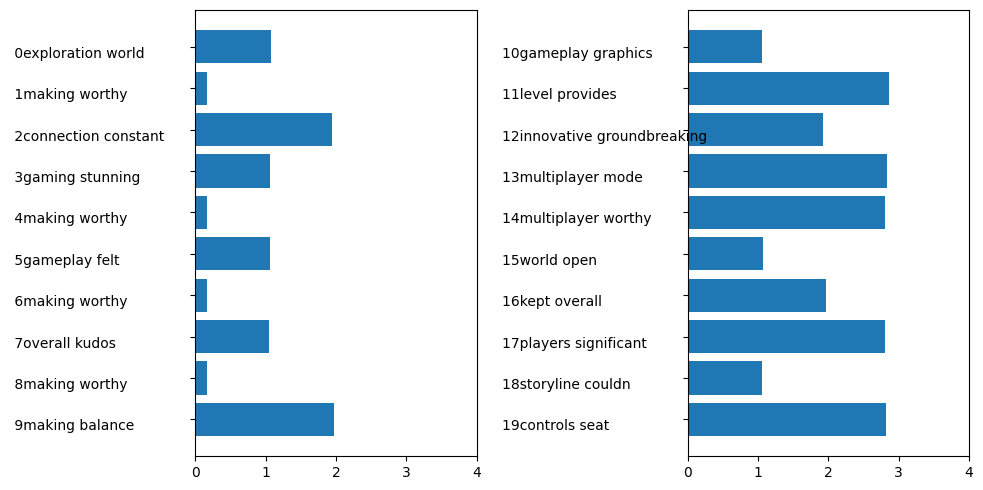

In [79]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
topic_names = ["{:>2}".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart
for col in [0,1]:
    start = col*10
    end = (col +1) *10
    ax[col].barh(np.arange(10), np.sum(document_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va = "top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 4)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()